In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
df = pd.read_csv("C:\\Users\\gillp\\Desktop\\kAGGLE_1\\P1\\train.csv")

In [43]:
df.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


In [44]:
df.shape

(2018352, 9)

In [45]:
filtered_df = df[df['is_consumption'] == 1]

In [46]:
df = filtered_df.reset_index(drop=True)

In [47]:
df.shape

(1009176, 9)

In [48]:
df.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
1,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
2,0,0,3,656.859,1,2021-09-01 00:00:00,0,5,2
3,0,1,0,59.000,1,2021-09-01 00:00:00,0,7,3
4,0,1,1,501.760,1,2021-09-01 00:00:00,0,9,4


In [49]:
df.index = pd.to_datetime(df["datetime"], format='%Y-%m-%d %H:%M:%S')

In [50]:
df.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
datetime,,,,,,,,,
2021-09-01,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2021-09-01,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
2021-09-01,0,0,3,656.859,1,2021-09-01 00:00:00,0,5,2
2021-09-01,0,1,0,59.000,1,2021-09-01 00:00:00,0,7,3
2021-09-01,0,1,1,501.760,1,2021-09-01 00:00:00,0,9,4


In [51]:
df['target'] = df['target'].interpolate()

In [52]:
df.isnull().sum()

county                0
is_business           0
product_type          0
target                0
is_consumption        0
datetime              0
data_block_id         0
row_id                0
prediction_unit_id    0
dtype: int64

<Axes: xlabel='datetime'>

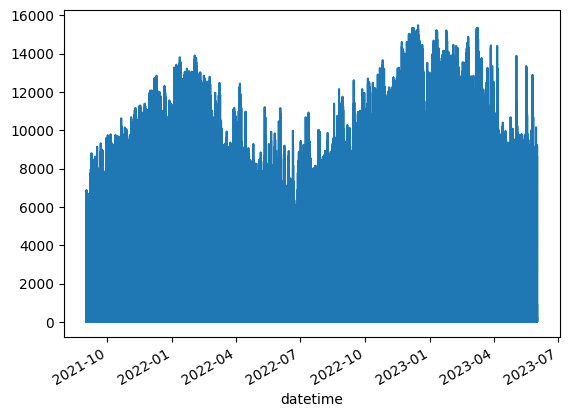

In [53]:
energy = df["target"]
energy.plot()

In [55]:
def df_to_X_y(df, window_sizes = 60):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+60]]
        X.append(row)
        label = df_as_np[i+60]
        y.append(label)
    return np.array(X), np.array(y)

In [56]:
window_size = 60
X,y = df_to_X_y(energy, window_size)
X.shape, y.shape

((1009116, 60, 1), (1009116,))

In [57]:
X_train, y_train = X[:10000], y[:10000]
X_val, y_val = X[10000:12000], y[10000:12000]
X_test, y_test = X[12000:14000], y[12000:14000]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((10000, 60, 1), (10000,), (2000, 60, 1), (2000,), (2000, 60, 1), (2000,))

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((60,1)))
model1.add(LSTM(64))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='relu'))


model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                16896     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [87]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [88]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 300, callbacks=[early_stopping])

Epoch 1/300
313/313 [==============================] - 10s 23ms/step - loss: 3013.9883 - root_mean_squared_error: 54.8998 - val_loss: 16357.1660 - val_root_mean_squared_error: 127.8951
Epoch 2/300
313/313 [==============================] - 7s 22ms/step - loss: 2745.3677 - root_mean_squared_error: 52.3963 - val_loss: 17721.6836 - val_root_mean_squared_error: 133.1228
Epoch 3/300
313/313 [==============================] - 6s 20ms/step - loss: 2652.7766 - root_mean_squared_error: 51.5051 - val_loss: 16761.6543 - val_root_mean_squared_error: 129.4668
Epoch 4/300
313/313 [==============================] - 7s 23ms/step - loss: 2632.3418 - root_mean_squared_error: 51.3064 - val_loss: 17107.2500 - val_root_mean_squared_error: 130.7947
Epoch 5/300
313/313 [==============================] - 7s 22ms/step - loss: 2598.2888 - root_mean_squared_error: 50.9734 - val_loss: 16759.9883 - val_root_mean_squared_error: 129.4604
Epoch 6/300
313/313 [==============================] - 7s 22ms/step - loss: 257

In [89]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

313/313 [==============================] - 3s 8ms/step


,Train Predictions,Actuals
0,271.635925,289.159
1,125.316963,77.691
2,0.000000,15.872
3,549.424744,595.498
4,0.000000,61.600
...,...,...
9995,0.000000,55.665
9996,822.462830,892.635
9997,0.000000,20.524
9998,150.405350,155.630


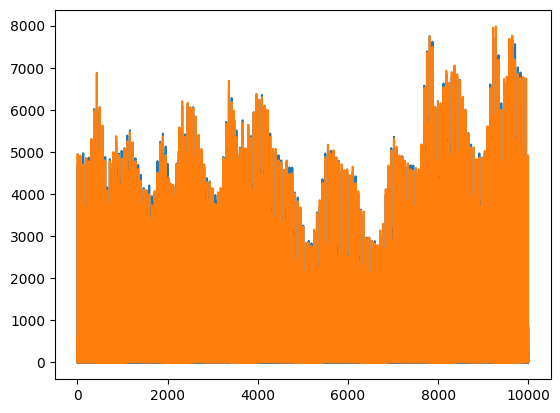

In [90]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

In [91]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

63/63 [==============================] - 1s 8ms/step


,Test Predictions,Actuals
0,0.000000,20.352
1,0.000000,9.983
2,187.455154,192.124
3,272.192200,253.930
4,0.000000,32.589
...,...,...
1995,0.000000,5.480
1996,0.000000,0.536
1997,0.000000,22.764
1998,408.986511,320.079


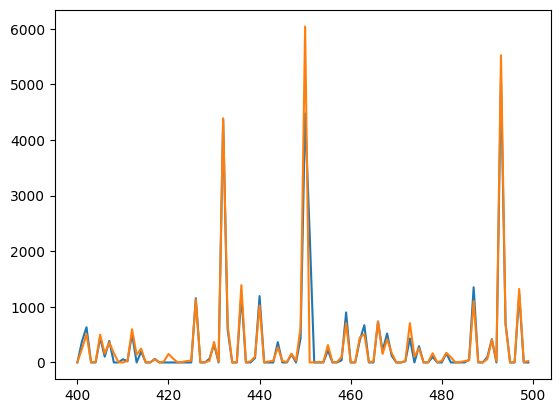

In [92]:
import matplotlib.pyplot as plt
plt.plot(test_results['Test Predictions'][400:500])
plt.plot(test_results['Actuals'][400:500])